# Parkinson Dataset with replicated acoustic features

In [1]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00489/ReplicatedAcousticFeatures-ParkinsonDatabase.csv -O ReplicatedAcousticFeatures_ParkinsonDatabase.csv

File ‘ReplicatedAcousticFeatures_ParkinsonDatabase.csv’ already there; not retrieving.


# Data Wrangling

In [4]:
data = pd.read_csv("ReplicatedAcousticFeatures_ParkinsonDatabase.csv", sep=",")

Change gender attribute to 0=Woman, 1=Man, which is consistent to other datasets.

In [5]:
data["Gender"].replace((0, 1), (1, 0), inplace=True)

Since the dataset does not have a measurement ID we add one.

In [6]:
data["measurement_id"] = range(1, len(data) + 1)

In [7]:
data.set_index("measurement_id", inplace=True)

In [8]:
data.to_csv("parkinson_dataset_with_replicated_acoustic_features.csv")

## ehrapy sanity check

In [9]:
columns_obs_only=["ID", "Recording"]

In [10]:
adata = ep.io.read_csv("parkinson_dataset_with_replicated_acoustic_features.csv",
                   columns_obs_only=columns_obs_only,
                   index_column="measurement_id")

In [11]:
adata=ep.pp.encode(adata,autodetect=True)

Updating layer originals ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100%

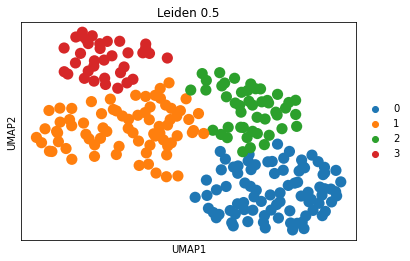

In [12]:
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

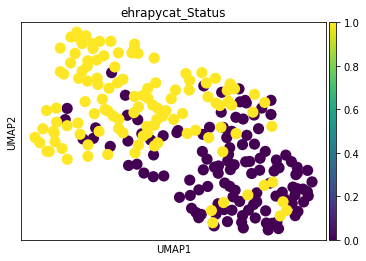

In [13]:
ep.pl.umap(adata, color=["ehrapycat_Status"], ncols=1, wspace=0.75)